Developing a gradient descent algorithm for liner regression model

In [ ]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')


Loading the dataset

In [ ]:
df=pd.read_csv('Advertising.csv')

In [ ]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


Setting the X and Y Variables

In [ ]:
X=df[['TV','Radio','Newspaper']]
Y=df['Sales']

In [ ]:
X.shape
Y.shape

(200,)

Standarizing X and Y

In [ ]:
Y=np.array((Y-Y.mean())/Y.std())
X=X.apply(lambda rec:(rec-rec.mean())/rec.std(),axis=0)

Implementing Gradient Descent Algorithm


1.   Randomly initialize the bias and the weight theta
2.   Calculate predicted value of y that is Y given the bias and the weight
3.   Calculate the cost function from predicted and actual values of Y
4.   Calculate gradient and the weights



Random Initialization of bias and weights

In [ ]:
import random
def initialize(dim):
  #np.random.seed(seed=42)
  #random.seed(42)
  b=random.random()
  theta=np.random.rand(dim)
  return b,theta

In [ ]:
b,theta=initialize(3)
print("Bias: ",b,"Weights: ",theta)

Bias:  0.4439513186463464 Weights:  [0.92396489 0.05155633 0.06354297]


Predict Y Values from bias and Weights

In [ ]:
def predict_Y(b,theta,X):
  return b + np.dot(X,theta)

In [ ]:
b,theta=initialize(3)
Y_hat=predict_Y(b,theta,X)

In [ ]:
Y_hat[0:10]

array([ 3.53610908,  0.53826004,  1.4045012 ,  2.27511933,  2.25046604,
        1.6023777 , -0.36009639, -0.37804669, -2.20360351,  0.69993066])

Calculate the cost function- MSE

In [ ]:
import math
def get_cost(Y,Y_hat):
  Y_resd=Y-Y_hat
  return np.sum(np.dot(Y_resd.T,Y_resd))/len(Y-Y_resd)

In [ ]:
b,theta=initialize(3)
Y_hat=predict_Y(b,theta,X)
get_cost(Y,Y_hat)

0.5253558445651124

Update bias and weights

The parameters passed to the function are


1.   x,y : the input and output variable
2.   y_hat: predicted value with current bias and weights
3.   b_0,theta_0: current bias and weights
4.   Learning rate: learning rate to adjust the update step



In [ ]:
def update_theta(x,y,y_hat,b_0,theta_o,learning_rate):
  db=(np.sum(y_hat-y)*2)/len(y)
  dw=(np.dot((y_hat-y),x)*2)/len(y)
  b_1=b_0-learning_rate*db
  theta_1=theta_o-learning_rate*dw
  return b_1,theta_1

In [ ]:
b,theta=initialize(3)
print("After initialization -Bias: ",b,"theta: ",theta)
Y_hat=predict_Y(b,theta,X)
b,theta=update_theta(X,Y,Y_hat,b,theta,0.01)
print("After first update -Bias: ",b,"theta: ",theta)
#get_cost(Y,Y_hat)

After initialization -Bias:  0.4733071000028529 theta:  [0.56745402 0.43024717 0.0722811 ]
After first update -Bias:  0.46384095800279584 theta:  [0.57117721 0.43202382 0.07171437]


0.37245638135702513

Finding the optimal Bias and Weights

In [ ]:
def run_gradient_descent(X,
                         Y,
                         alpha=0.01,
                         num_iterations=100):
  b,theta=initialize(X.shape[1])
  iter_num=0
  gd_iterations_df=pd.DataFrame(columns=['iteration','cost'])
  result_idx=0

  for each_iter in range(num_iterations):
    Y_hat=predict_Y(b,theta,X)
    this_cost=get_cost(Y,Y_hat)
    prev_b=b
    prev_theta=theta
    b,theta=update_theta(X,Y,Y_hat,prev_b,prev_theta,alpha)

    if(iter_num%10==0):
      gd_iterations_df.loc[result_idx]=[iter_num,this_cost]
      result_idx=result_idx+1
    iter_num +=1
  print("Final Estimate of b and theta : ",b,theta)

  return gd_iterations_df,b,theta



In [ ]:
gd_iterations_df,b,theta=run_gradient_descent(X,Y,alpha=0.001,num_iterations=200)

Final Estimate of b and theta :  0.31516040347417285 [0.39731522 0.31571747 0.61334115]


In [ ]:
gd_iterations_df[0:10]

,iteration,cost
0,0.0,1.216903
1,10.0,1.176424
2,20.0,1.137510
3,30.0,1.100098
4,40.0,1.064126
5,50.0,1.029535
6,60.0,0.996269
7,70.0,0.964275
8,80.0,0.933500
9,90.0,0.903896


Plotting the cost function against the iterations

Text(0, 0.5, 'Cost or MSE')

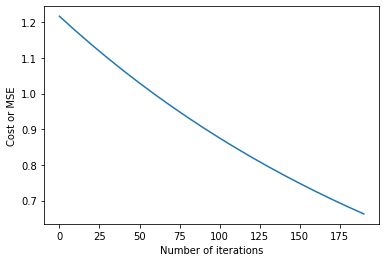

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
plt.plot(gd_iterations_df['iteration'],gd_iterations_df['cost'])
plt.xlabel("Number of iterations")
plt.ylabel("Cost or MSE")

In [ ]:
alpha_df_1,b,theta=run_gradient_descent(X,Y,alpha=0.01,num_iterations=2000)


Final Estimate of b and theta :  2.778981040403135e-16 [ 0.75306591  0.53648155 -0.00433069]


In [ ]:
alpha_df_2,b,theta=run_gradient_descent(X,Y,alpha=0.001,num_iterations=2000)

Final Estimate of b and theta :  0.012981420713692326 [ 0.74510489  0.53860236 -0.00363767]


Text(0.5, 1.0, 'Cost Vs. Iterations for different alpha values')

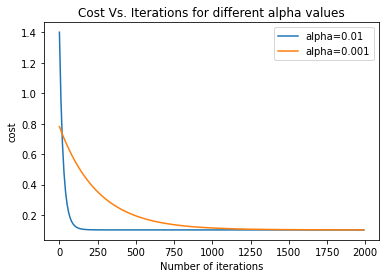

In [ ]:
plt.plot(alpha_df_1['iteration'],alpha_df_1['cost'],label="alpha=0.01")
plt.plot(alpha_df_2['iteration'],alpha_df_2['cost'],label="alpha=0.001")
plt.legend()
plt.ylabel('cost')
plt.xlabel('Number of iterations')
plt.title('Cost Vs. Iterations for different alpha values')

 0.01 is the optimum value as it takes less iterations to converge. 0.001 takes around a 1000 iterations to converge the cost value.

Developing a gradient descent algorithm for liner regression model

In [ ]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')


Loading the dataset

In [ ]:
df=pd.read_csv('drinks.csv')

In [ ]:
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


Setting the X and Y Variables

In [ ]:
X=df[['beer_servings','spirit_servings','wine_servings']]
Y=df['total_litres_of_pure_alcohol']

In [ ]:
X.shape
Y.shape

(193,)

Standarizing X and Y

In [ ]:
Y=np.array((Y-Y.mean())/Y.std())
X=X.apply(lambda rec:(rec-rec.mean())/rec.std(),axis=0)

Implementing Gradient Descent Algorithm


1.   Randomly initialize the bias and the weight theta
2.   Calculate predicted value of y that is Y given the bias and the weight
3.   Calculate the cost function from predicted and actual values of Y
4.   Calculate gradient and the weights



Random Initialization of bias and weights

In [ ]:
import random
def initialize(dim):
  #np.random.seed(seed=42)
  #random.seed(42)
  b=random.random()
  theta=np.random.rand(dim)
  return b,theta

In [ ]:
b,theta=initialize(3)
print("Bias: ",b,"Weights: ",theta)

Bias:  0.4030041041134773 Weights:  [0.16858287 0.3208479  0.97830144]


Predict Y Values from bias and Weights

In [ ]:
def predict_Y(b,theta,X):
  return b + np.dot(X,theta)

In [ ]:
b,theta=initialize(3)
Y_hat=predict_Y(b,theta,X)

In [ ]:
Y_hat[0:10]

array([-1.19377889,  0.34319   , -0.99295439,  2.5351408 ,  0.49016563,
        0.33727746,  1.10529248,  0.05578795,  1.68740978,  1.68581738])

Calculate the cost function- MSE

In [ ]:
import math
def get_cost(Y,Y_hat):
  Y_resd=Y-Y_hat
  return np.sum(np.dot(Y_resd.T,Y_resd))/len(Y-Y_resd)

In [ ]:
b,theta=initialize(3)
Y_hat=predict_Y(b,theta,X)
get_cost(Y,Y_hat)

0.46549748702370686

Update bias and weights

The parameters passed to the function are


1.   x,y : the input and output variable
2.   y_hat: predicted value with current bias and weights
3.   b_0,theta_0: current bias and weights
4.   Learning rate: learning rate to adjust the update step



In [ ]:
def update_theta(x,y,y_hat,b_0,theta_o,learning_rate):
  db=(np.sum(y_hat-y)*2)/len(y)
  dw=(np.dot((y_hat-y),x)*2)/len(y)
  b_1=b_0-learning_rate*db
  theta_1=theta_o-learning_rate*dw
  return b_1,theta_1

In [ ]:
b,theta=initialize(3)
print("After initialization -Bias: ",b,"theta: ",theta)
Y_hat=predict_Y(b,theta,X)
b,theta=update_theta(X,Y,Y_hat,b,theta,0.01)
print("After first update -Bias: ",b,"theta: ",theta)
#get_cost(Y,Y_hat)

After initialization -Bias:  0.17166426791792277 theta:  [0.49246107 0.83895572 0.23993239]
After first update -Bias:  0.1682309825595643 theta:  [0.48911775 0.82986953 0.24002448]


Finding the optimal Bias and Weights

In [ ]:
def run_gradient_descent(X,
                         Y,
                         alpha=0.01,
                         num_iterations=100):
  b,theta=initialize(X.shape[1])
  iter_num=0
  gd_iterations_df=pd.DataFrame(columns=['iteration','cost'])
  result_idx=0

  for each_iter in range(num_iterations):
    Y_hat=predict_Y(b,theta,X)
    this_cost=get_cost(Y,Y_hat)
    prev_b=b
    prev_theta=theta
    b,theta=update_theta(X,Y,Y_hat,prev_b,prev_theta,alpha)

    if(iter_num%10==0):
      gd_iterations_df.loc[result_idx]=[iter_num,this_cost]
      result_idx=result_idx+1
    iter_num +=1
  print("Final Estimate of b and theta : ",b,theta)

  return gd_iterations_df,b,theta



In [ ]:
gd_iterations_df,b,theta=run_gradient_descent(X,Y,alpha=0.001,num_iterations=200)

Final Estimate of b and theta :  0.5886403942120809 [0.46804745 0.12728364 0.66803731]


In [ ]:
gd_iterations_df[0:10]

,iteration,cost
0,0.0,1.154343
1,10.0,1.115340
2,20.0,1.077844
3,30.0,1.041798
4,40.0,1.007142
5,50.0,0.973821
6,60.0,0.941784
7,70.0,0.910980
8,80.0,0.881359
9,90.0,0.852876


Plotting the cost function against the iterations

Text(0, 0.5, 'Cost or MSE')

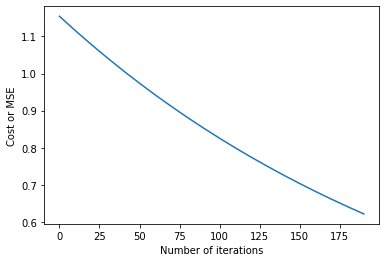

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
plt.plot(gd_iterations_df['iteration'],gd_iterations_df['cost'])
plt.xlabel("Number of iterations")
plt.ylabel("Cost or MSE")

In [ ]:
alpha_df_1,b,theta=run_gradient_descent(X,Y,alpha=0.01,num_iterations=2000)


Final Estimate of b and theta :  -8.273988547396094e-17 [0.49060884 0.36401564 0.33805408]


In [ ]:
alpha_df_2,b,theta=run_gradient_descent(X,Y,alpha=0.001,num_iterations=2000)

Final Estimate of b and theta :  0.006133819220940679 [0.5045898  0.35759548 0.32809633]


Text(0.5, 1.0, 'Cost Vs. Iterations for different alpha values')

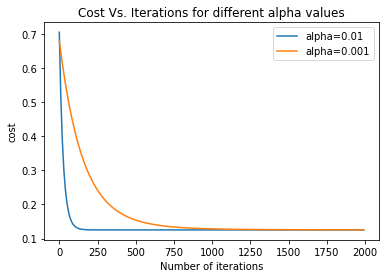

In [ ]:
plt.plot(alpha_df_1['iteration'],alpha_df_1['cost'],label="alpha=0.01")
plt.plot(alpha_df_2['iteration'],alpha_df_2['cost'],label="alpha=0.001")
plt.legend()
plt.ylabel('cost')
plt.xlabel('Number of iterations')
plt.title('Cost Vs. Iterations for different alpha values')

Alpha will be different for every dataset. For this dataset, after numerous iterations we found that the optimum value of alpha is 0.01